In [1]:
# Append base directory
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
base_dir = currentdir[:currentdir.index('python')] + 'python/'
sys.path.insert(0,base_dir) 
print("Appended base directory", base_dir)

# Import modules
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import local libraries
from aux.stat import empirical

Appended base directory /media/aleksejs/DataHDD/work/codes/snippets-data-analysis/python/


# Cumulative Distributions

The general cumulative distribution is defined as

$CDF_{p(x)}(x') = \int_{x=-\infty}^{x'} p(x)dx$

Generate empirical cumulative distribution functions (ECDF), defined as

$ECDF_{\vec{x}}(x') = \frac{1}{N}\sum_i H(x_i < x')$

/opt/anaconda3/envs/py36qt5/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


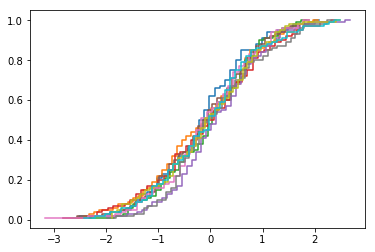

In [2]:
import statsmodels.api as sm

np.random.seed()
NData = 100
NDataSet = 10
seqRandLst = np.random.normal(0, 1, NData*NDataSet).reshape((NDataSet, NData))

plt.figure()
for seqRand in seqRandLst:
    ecdf = sm.distributions.ECDF(seqRand)
    ecdf_x = np.linspace(np.min(seqRand), np.max(seqRand))
    ecdf_y = ecdf(ecdf_x)
    plt.step(ecdf_x, ecdf_y)
plt.show()

# Sampling

**How to sample from arbitrary probability distribution?**
CDF of a probability distribution can be used to convert uniformly distributed random numbers to random numbers distributed with respect to the desired probability distribution. Let $X \sim \zeta$ with CDF $P_{\zeta}[X < x] = F_{\zeta}(x)$. Let $Q \sim U(0, 1)$ be uniformly distributed. Then, $Y = F_{\zeta}^{-1}(Q) \sim \zeta$

**How to generate random data similar to observed data?**
* **Bootstrapping** - Choose datapoints from observed datapoints at random. Datapoints may repeat.
* **Resampling** - Construct empirical CDF and sample data from it. 

It is easy to see that these approaches should produce exactly the same data. However, bootstrapping is preferable, because
* It naturally extends to more than 1 dimension, while resampling does not
* It does not require data sorting
* It is faster and does not have precision issues, as it relies on integer random numbers instead of floats to do the same job

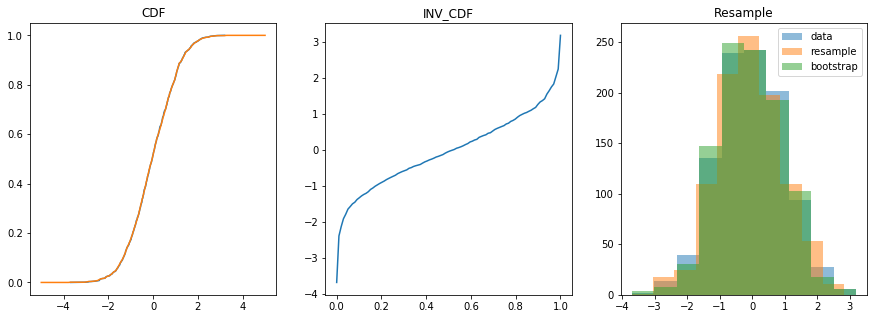

In [4]:
NDATA = 1000
data = np.random.normal(0, 1, NDATA)
dataSorted = np.sort(data)

fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

# Plot CDF
dataSample = np.linspace(-5,5,100)
dataCDF = np.linspace(0, 1, NDATA)
ax[0].plot(dataSorted, dataCDF)
ax[0].plot(dataSample, empirical.empCDF(dataSorted, dataSample))
ax[0].set_title("CDF")

# Plot inverse CDF
pArr = np.linspace(0, 1, 100)
invCDFarr = empirical.invCDF_1D(dataSorted, pArr)
ax[1].plot(pArr, invCDFarr)
ax[1].set_title("INV_CDF")

# Sample from inverse CDF
dataSampleInvCDF = empirical.resampleCDF_1D(dataSorted, NDATA)
dataSampleBoot = empirical.resampleBootstrap(data, NDATA)
ax[2].hist(data, alpha=0.5, label="data")
ax[2].hist(dataSampleInvCDF, alpha=0.5, label="resample")
ax[2].hist(dataSampleBoot, alpha=0.5, label="bootstrap")
ax[2].set_title("Resample")
ax[2].legend()

plt.show()